In [1]:
import pandas as pd

In [2]:
# renombrar fuente de datos
gapminder = pd.read_csv(r'./gapminder_full.csv')

# mostrar encabezado de los datos
gapminder.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


### Parte 1. Explorando los datos

In [3]:
# mirar la forma de los datos
gapminder.shape

(1704, 6)

In [4]:
# mirar el tipo de dato por variable
gapminder.dtypes

country        object
year            int64
population      int64
continent      object
life_exp      float64
gdp_cap       float64
dtype: object

#### Preguntas sobre country

##### ¿Cuántos países hay en 2007?

In [5]:
len(gapminder[['country', 'year']].query('year == 2007'))

142

##### ¿Cuántos países por continente?

In [6]:
gapminder[['continent', 'country']].groupby(by='continent').count()

,country
continent,
Africa,624
Americas,300
Asia,396
Europe,360
Oceania,24


#### Preguntas sobre year

##### ¿De qué año a qué año van los datos?

In [7]:
print(f'Año inicial: {gapminder.year.min()} \nAño final: {gapminder.year.max()}')

Año inicial: 1952 
Año final: 2007


##### ¿Cuántos datos hay por año?

In [8]:
gapminder[['country', 'year']].groupby('year').size()

year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
dtype: int64

#### Preguntas sobre población

##### ¿Cuál es la población mínima y máxima?

In [9]:
gapminder.population.agg(['min', 'max']).apply('{:,.0f}'.format)

min           60,011
max    1,318,683,096
Name: population, dtype: object

##### ¿Cuál es la población mundial por año?

In [10]:
gapminder[['year', 'population']].groupby('year').sum()

,population
year,
1952,2406957150
1957,2664404580
1962,2899782974
1967,3217478384
1972,3576977158
1977,3930045807
1982,4289436840
1987,4691477418
1992,5110710260


##### ¿Cuál es el país con mayor y menor población para 2007?

In [11]:
gapminder[['year', 'country', 'population']].query('year == 2007').agg(['min', 'max'])

,year,country,population
min,2007,Afghanistan,199579
max,2007,Zimbabwe,1318683096


##### ¿Cuál es la población por continente para 2007?

In [12]:
gapminder[['year', 'continent', 'population']].query('year == 2007').groupby('continent').sum().loc[:,'population'].apply('{:,.0f}'.format)

continent
Africa        929,539,692
Americas      898,871,184
Asia        3,811,953,827
Europe        586,098,529
Oceania        24,549,947
Name: population, dtype: object

##### ¿Cómo se distribuye (histograma) la población por año?

Text(0.5, 1.0, 'Distribución de la población por año')

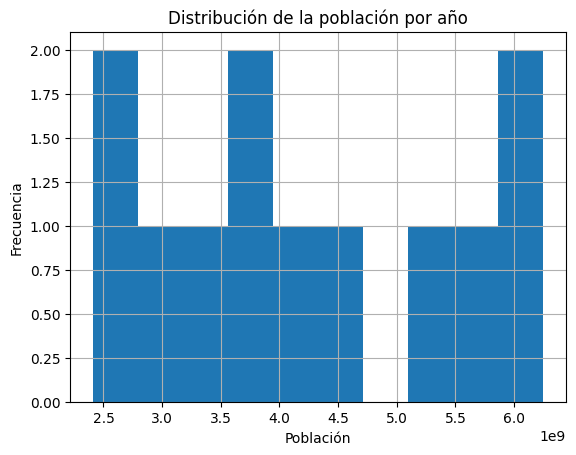

In [13]:
import matplotlib.pyplot as plt

pop_year = gapminder.groupby('year')['population'].sum()
pop_year.hist()

plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.title('Distribución de la población por año')

#### Preguntas sobre continente

##### ¿Cuáles continentes hay?

In [14]:
list(gapminder.continent.unique())

['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']

##### ¿Cuántos países hay en cada continente para 2007?

In [15]:
gapminder.query('year == 2007')['continent'].value_counts()

Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: continent, dtype: int64

#### Preguntas sobre experiencia de vida (life_exp)

##### ¿Cuáles son los mínimos y los máximos de life_exp para el último año?

In [16]:
gapminder.query('year == 2007')['life_exp'].agg(['min', 'max'])

min    39.613
max    82.603
Name: life_exp, dtype: float64

##### ¿Cómo se distribuye el promedio de life_exp por continente para el último año?

In [17]:
life = gapminder.query('year == 2007')[['continent', 'life_exp']].groupby('continent').mean()
life

,life_exp
continent,
Africa,54.806038
Americas,73.608120
Asia,70.728485
Europe,77.648600
Oceania,80.719500


##### ¿Cuál es el life_exp por país para 2007?

In [18]:
gapminder.query('year == 2007')[['country', 'life_exp']]

,country,life_exp
11,Afghanistan,43.828
23,Albania,76.423
35,Algeria,72.301
47,Angola,42.731
59,Argentina,75.320
...,...,...
1655,Vietnam,74.249
1667,West Bank and Gaza,73.422
1679,"Yemen, Rep.",62.698
1691,Zambia,42.384


#### Preguntas sobre el límite del producto interno bruto (gdp_cap)

##### ¿Cuál es el gdp_cap por país?

In [19]:
gapminder.groupby('country')['gdp_cap'].sum().apply('{:,.2f}'.format)

country
Afghanistan             9,632.10
Albania                39,064.40
Algeria                53,112.31
Angola                 43,285.21
Argentina             107,466.65
                         ...    
Vietnam                12,212.55
West Bank and Gaza     45,119.96
Yemen, Rep.            18,831.30
Zambia                 16,298.39
Zimbabwe                7,630.30
Name: gdp_cap, Length: 142, dtype: object

##### ¿Cuál es el gdp_cap por continente?

In [20]:
gapminder.groupby('continent')['gdp_cap'].sum().apply('{:,.2f}'.format)

continent
Africa      1,368,902.86
Americas    2,140,833.11
Asia        3,129,251.57
Europe      5,209,011.19
Oceania       446,918.62
Name: gdp_cap, dtype: object

##### ¿Cómo se distribuye gdp per cap para el año 2007 (cuantiles)?

In [21]:
gapminder.query('year == 2007')['gdp_cap'].agg('quantile', q=[0.25,0.5,0.75]).apply('{:,.2f}'.format)

0.25     1,624.84
0.50     6,124.37
0.75    18,008.84
Name: gdp_cap, dtype: object

#### Buscando relaciones entre las variables

##### ¿A mayor life_exp, mayor gdp_cap?

In [22]:
gapminder['life_exp'].corr(gapminder['gdp_cap']).round(2)

0.58

Una correlación de 0.58 entre la esperanza de vida y el gdp_cap indica una relación estadística moderadamente fuerte y positiva entre estas dos variables. En otras palabras, existe una tendencia a que a medida que aumenta el gdp_cap, también aumente la experiencia de vida de la población.

##### ¿A mayor población, mayor life_exp?

In [23]:
gapminder['population'].corr(gapminder['life_exp']).round(2)

0.06

Una correlación de 0.06 entre la cantidad de población y la esperanza de vida indica una relación estadística muy débil entre estas dos variables. En otras palabras, hay una ligera tendencia a que a medida que aumenta la cantidad de población, la experiencia de vida también aumente, pero la relación es muy pequeña.

##### ¿A mayor población, mayor gdp_cap?

In [24]:
gapminder['population'].corr(gapminder['gdp_cap']).round(2)

-0.03

Una correlación de -0.03 entre la población y el gdp_cap indica una relación muy débil y casi nula entre estas dos variables. Además, al ser una correlación negativa, sugiere que a medida que aumenta la cantidad de población, el gdp_cap tiende a disminuir ligeramente.

##### ¿A mayor año, mayor life_exp?

In [25]:
gapminder['year'].corr(gapminder['life_exp']).round(2)

0.44

Una correlación de 0.44 entre los años y la esperanza de vida (life_exp) indica una relación estadística moderadamente fuerte y positiva entre estas dos variables. En otras palabras, existe una tendencia a que a medida que aumentan los años, también aumente la esperanza de vida de la población.

##### ¿A mayor año, mayor gdp_cap?

In [26]:
gapminder['year'].corr(gapminder['gdp_cap']).round(2)

0.23

Una correlación de 0.23 entre los años y el PIB per cápita (gdp_cap) indica una relación estadística débil y positiva entre estas dos variables. En otras palabras, hay una ligera tendencia a que a medida que aumentan los años, también aumente el PIB per cápita de la población.